## Spotify Song-Album Popularity EDA

This notebook performs exploratory data analysis on the Spotify data.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 25)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

from tqdm import tqdm_notebook

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from collections import Counter

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [3]:
# Load data
data = pd.read_csv('data/full_eda_data.csv')

/Users/hakeemangulu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,7,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,track_id,album_id,track_number,track_count,duration,explicit,track_pop,album_pop,comparative_pop,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0UaMYEvWZi0ZqiDOoHU3YI,6vV5UrXcfyQD1wu4Qo2I9K,4,16.0,226863.0,TRUE,68.0,59,9.600000,0.904,0.813,-7.105,0.1210,0.03110,0.00697,0.0471,0.810,125.461
1,6I9VzXrHxO9rA9A5euc8Ak,0z7pVBGOD7HCIB7S8eLkLI,6,13.0,198800.0,FALSE,79.0,71,8.666667,0.774,0.838,-3.914,0.1140,0.02490,0.025,0.2420,0.924,143.04
2,0WqIKmW4BTrj3eJFmnCKMv,25hVFAxTlDvXbx2X2QkUkE,1,16.0,235933.0,FALSE,30.0,23,7.466667,0.664,0.758,-6.583,0.2100,0.00238,0,0.0598,0.701,99.259
3,1AWQoqb9bSvzTjaLralEkT,6QPkyl04rXwTGlGlcYaRoW,6,13.0,267266.0,FALSE,73.0,72,1.083333,0.891,0.714,-6.055,0.1400,0.20200,0.000234,0.0521,0.818,100.972
4,1lzr43nnXAijIGYnCT8M8H,6NmFmPX56pcLBOFMhIiKvF,3,15.0,227600.0,FALSE,16.0,10,6.428571,0.853,0.606,-4.596,0.0713,0.05610,0,0.3130,0.654,94.759


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ffdf750>,
      dtype=object)

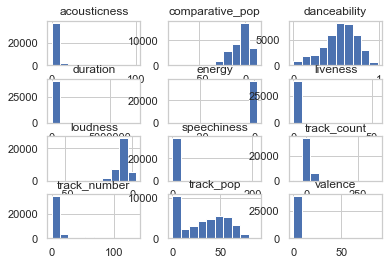

In [17]:
data.hist()

In [5]:
data.describe()

,track_number,track_count,duration,track_pop,comparative_pop,danceability,energy,loudness,speechiness,acousticness,liveness,valence
count,40415.000000,40415.000000,4.041500e+04,40415.000000,40415.000000,40415.000000,40415.000000,40415.000000,40415.000000,40415.000000,40415.000000,40415.000000
mean,9.129902,14.358511,2.208703e+05,32.537767,-5.282625,0.545371,0.101695,-7.389449,8.455385,1.220592,0.586926,3.139018
std,12.611353,12.209903,1.024597e+05,23.506694,10.096814,0.193047,2.151203,4.512736,31.837571,4.029411,1.895489,11.693014
min,0.000000,-63.800000,0.000000e+00,0.000000,-78.947368,0.000000,-30.016000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,1.861530e+05,7.000000,-12.000000,0.429000,0.415000,-9.382500,0.034700,0.027200,0.099100,0.291000
50%,6.000000,13.000000,2.222530e+05,36.000000,-2.181818,0.565000,0.633000,-6.648000,0.048600,0.174000,0.137000,0.498000
75%,10.000000,16.000000,2.612595e+05,52.000000,1.076923,0.685000,0.803000,-4.753000,0.112000,0.605000,0.304000,0.732000
max,135.000000,349.000000,7.211978e+06,88.000000,12.500000,0.987000,1.000000,2.766000,211.261000,100.000000,54.000000,88.000000


In [71]:
data['duration']

0        226863.0
1        198800.0
2        235933.0
3        267266.0
4        227600.0
           ...   
40410    171786.0
40411    265320.0
40412    435280.0
40413    282266.0
40414    222026.0
Name: duration, Length: 40415, dtype: float64

In [70]:
data['duration'].astype(int)

0        226863
1        198800
2        235933
3        267266
4        227600
          ...  
40410    171786
40411    265320
40412    435280
40413    282266
40414    222026
Name: duration, Length: 40415, dtype: int64

In [96]:
data['instrumentalness'][40414]

4.64e-05

In [99]:
pd.to_numeric(data['instrumentalness'], errors='coerce')

0        0.006970
1        0.025000
2        0.000000
3        0.000234
4        0.000000
           ...   
40410    0.000007
40411    0.429000
40412    0.868000
40413    0.003380
40414    0.000046
Name: instrumentalness, Length: 37665, dtype: float64

In [93]:
data['instrumentalness'].str.isdecimal()

0        False
1        False
2         True
3        False
4         True
         ...  
40410      NaN
40411      NaN
40412      NaN
40413      NaN
40414      NaN
Name: instrumentalness, Length: 40415, dtype: object

In [62]:
(data['album_pop'] == 'FALSE').sum()

2156

In [68]:
data['track_id']

0        0UaMYEvWZi0ZqiDOoHU3YI
1        6I9VzXrHxO9rA9A5euc8Ak
2        0WqIKmW4BTrj3eJFmnCKMv
3        1AWQoqb9bSvzTjaLralEkT
4        1lzr43nnXAijIGYnCT8M8H
                  ...          
40410    62uYBzWnNZQC57wazPwahz
40411    0Y6WjYBWld3reWsTMT8FTd
40412    4RBX6oibNBv6XljbjzONH0
40413    4RMCSBsOSY40jMKnJwAdiS
40414    3qmFOLo0GiUX4MCI6b08kE
Name: track_id, Length: 40415, dtype: object

In [63]:
data['album_pop'] = data['album_pop'].replace({'TRUE': 0, 'FALSE': 0})

In [86]:
data['instrumentalness'][0]

'0.00697'

In [87]:
data['instrumentalness'].astype(float)
data['instrumentalness'].apply(lambda x: isinstance(x, (int, float)))

ValueError: could not convert string to float: '1tc6RFcNQk2mQ0c0ZdiEBW'

In [42]:
data['explicit'].replace({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})

0        1
1        0
2        0
3        0
4        0
        ..
40410    0
40411    0
40412    0
40413    0
40414    0
Name: explicit, Length: 40415, dtype: int64